Swanand Wirkar (32574) 
Problem Statement: Analyzing Weather Data from OpenWeatherMap API

2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for
a specific location

In [2]:
import requests

In [3]:
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
API_KEY = open('api_key', 'r').read()
CITY = "London"

url = BASE_URL + "&appid=" + API_KEY + "&q=" + CITY

In [4]:
response = requests.get(url).json()

In [5]:
print(response)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 288.57, 'feels_like': 288.57, 'temp_min': 287.01, 'temp_max': 289.7, 'pressure': 1022, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 250}, 'clouds': {'all': 75}, 'dt': 1692588767, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1692593702, 'sunset': 1692645170}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


3.Extract relevant weather attributes such as temperature, humidity, wind speed, and
precipitation from the API response

In [6]:
if response['cod'] == 200:
    # Extract relevant weather attributes
    temperature = response['main']['temp']
    humidity = response['main']['humidity']
    wind_speed = response['wind']['speed']
    
    # Check if 'rain' key is present (for precipitation)
    if 'rain' in response:
        precipitation = response['rain']['1h']  
    else:
        precipitation = 0  

    
    print(f'Temperature: {temperature} Kelvin')
    print(f'Humidity: {humidity}%')
    print(f'Wind Speed: {wind_speed} m/s')
    print(f'Precipitation (last 1 hour): {precipitation} mm')
else:
    print('Error:', response['message'])

Temperature: 288.57 Kelvin
Humidity: 92%
Wind Speed: 3.6 m/s
Precipitation (last 1 hour): 0 mm


4.Clean and preprocess the retrieved data, handling missing values or inconsistent
formats.

In [36]:
def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        # Extract and clean relevant weather attributes
        cleaned_data['temperature'] = data['main'].get('temp', None)
        cleaned_data['humidity'] = data['main'].get('humidity', None)
        cleaned_data['wind_speed'] = data['wind'].get('speed', None)
        
        # Check if 'rain' key is present (for precipitation)
        if 'rain' in data:
            cleaned_data['precipitation'] = data['rain'].get('1h', 0)  
        else:
            cleaned_data['precipitation'] = 0  
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def main():
    CITY = "London"
    
    # Get raw weather data
    raw_data = get_weather_data(CITY)
    
    # Clean and preprocess the data
    preprocessed_data = clean_and_preprocess(raw_data)
    
    # Print preprocessed data
    if preprocessed_data:
        print('Preprocessed Weather Data:')
        for attribute, value in preprocessed_data.items():
            print(f'{attribute.capitalize()}: {value}')

if __name__ == "__main__":
    main()

Preprocessed Weather Data:
Temperature: 298.6
Humidity: 58
Wind_speed: 4.12
Precipitation: 0


5.Perform data modeling to analyze weather patterns, such as calculating average
temperature, maximum/minimum values, or trends over time.

In [10]:
import requests
from datetime import datetime

def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        # Extract and clean relevant weather attributes
        cleaned_data['temperature'] = data['main'].get('temp', None)
        
        
        # Check if 'rain' key is present (for precipitation)
        if 'rain' in data:
            cleaned_data['precipitation'] = data['rain'].get('1h', 0)  # Precipitation in the last 1 hour
        else:
            cleaned_data['precipitation'] = 0  # No recent precipitation
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def analyze_weather_patterns(data_list):
    total_temp = 0
    max_temp = float('-inf')
    min_temp = float('inf')
    

    for data in data_list:
        total_temp += data.get('temperature', 0)
        max_temp = max(max_temp, data.get('temperature', float('-inf')))
        min_temp = min(min_temp, data.get('temperature', float('inf')))
        
    
    num_entries = len(data_list)
    average_temp = total_temp / num_entries
    

    return {
        'average_temperature': average_temp,
        'max_temperature': max_temp,
        'min_temperature': min_temp,
        
    }

def main():
    CITY = "London"
    NUM_DAYS = 5  # Number of days to analyze

    data_list = []
    for _ in range(NUM_DAYS):
        raw_data = get_weather_data(CITY)
        preprocessed_data = clean_and_preprocess(raw_data)
        if preprocessed_data:
            data_list.append(preprocessed_data)

    if data_list:
        analysis_results = analyze_weather_patterns(data_list)
        print('Weather Pattern Analysis:')
        for attribute, value in analysis_results.items():
            if 'temperature' in attribute:
                unit = 'Kelvin'
            
            else:
                unit = '%'
            print(f'{attribute.replace("_", " ").capitalize()}: {value} {unit}')

if __name__ == "__main__":
    main()


Weather Pattern Analysis:
Average temperature: 288.58 Kelvin
Max temperature: 288.58 Kelvin
Min temperature: 288.58 Kelvin


6.Visualize the weather data using appropriate plots, such as line charts, bar plots, or
scatter plots, to represent temperature changes, precipitation levels, or wind speed
variations

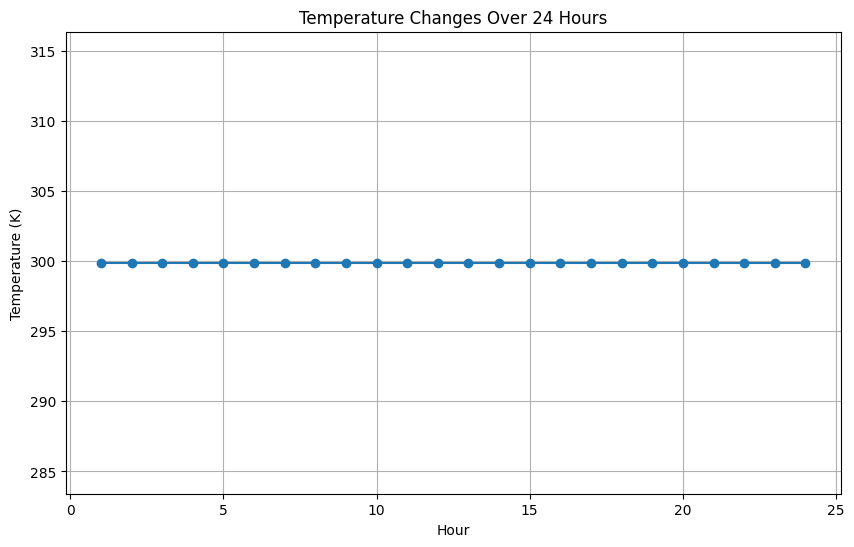

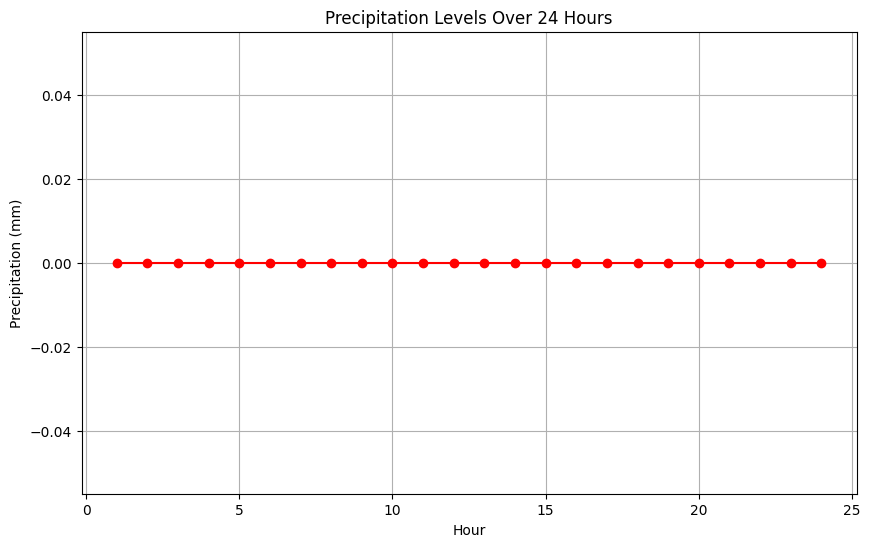

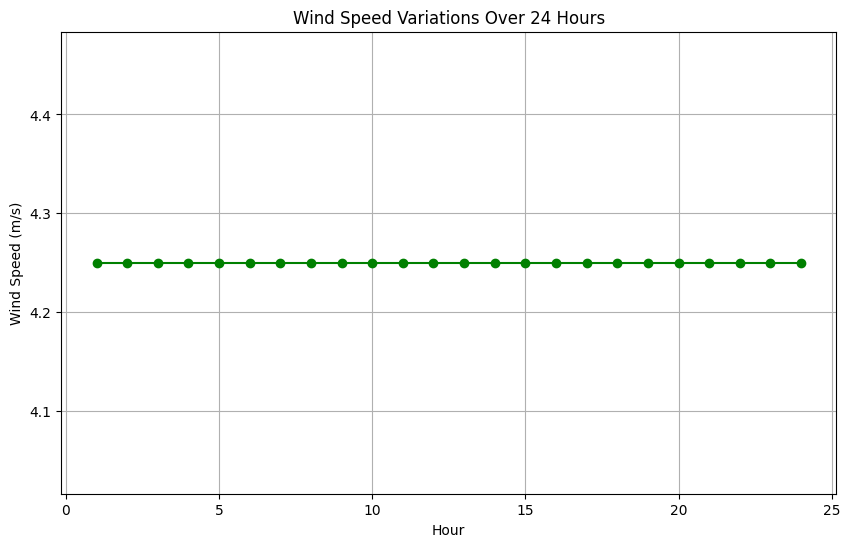

In [19]:
import requests
import matplotlib.pyplot as plt

def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        # Extract and clean relevant weather attributes
        cleaned_data['temperature'] = data['main'].get('temp', None)
        cleaned_data['precipitation'] = data.get('rain', {}).get('1h', 0)
        cleaned_data['wind_speed'] = data['wind'].get('speed', None)
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def main():
    CITY = "Pune"
    NUM_HOURS = 24  # Number of hours to analyze

    data_list = []
    for _ in range(NUM_HOURS):
        raw_data = get_weather_data(CITY)
        preprocessed_data = clean_and_preprocess(raw_data)
        if preprocessed_data:
            data_list.append(preprocessed_data)

    if data_list:
        hours = [i+1 for i in range(NUM_HOURS)]
        temperatures = [data.get('temperature', 0) for data in data_list]
        precipitation = [data.get('precipitation', 0) for data in data_list]
        wind_speed = [data.get('wind_speed', 0) for data in data_list]
        
        # Plot temperature changes
        plt.figure(figsize=(10, 6))
        plt.plot(hours, temperatures, marker='o')
        plt.title('Temperature Changes Over 24 Hours')
        plt.xlabel('Hour')
        plt.ylabel('Temperature (K)')
        plt.grid(True)
        plt.show()

        # Plot precipitation levels
        plt.figure(figsize=(10, 6))
        plt.plot(hours, precipitation, marker='o', color='r')
        plt.title('Precipitation Levels Over 24 Hours')
        plt.xlabel('Hour')
        plt.ylabel('Precipitation (mm)')
        plt.grid(True)
        plt.show()

        # Plot wind speed variations
        plt.figure(figsize=(10, 6))
        plt.plot(hours, wind_speed, marker='o', color='g')
        plt.title('Wind Speed Variations Over 24 Hours')
        plt.xlabel('Hour')
        plt.ylabel('Wind Speed (m/s)')
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    main()


7.Apply data aggregation techniques to summarize weather statistics by specific time
periods

In [2]:
import requests

def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        cleaned_data['temperature'] = data['main'].get('temp', None)
        cleaned_data['humidity'] = data['main'].get('humidity', None)
        cleaned_data['wind_speed'] = data['wind'].get('speed', None)
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def aggregate_weather_data(data_list):
    aggregated_data = {
        'temperature': [],
        'humidity': [],
        'wind_speed': []
    }
    
    for data in data_list:
        aggregated_data['temperature'].append(data.get('temperature', 0))
        aggregated_data['humidity'].append(data.get('humidity', 0))
        aggregated_data['wind_speed'].append(data.get('wind_speed', 0))
    
    return aggregated_data

def main():
    CITY = "Pune"
    NUM_DAYS = 5  # Number of days to analyze
    HOURS_PER_DAY = 24
    
    data_list = []
    for _ in range(NUM_DAYS * HOURS_PER_DAY):
        raw_data = get_weather_data(CITY)
        preprocessed_data = clean_and_preprocess(raw_data)
        if preprocessed_data:
            data_list.append(preprocessed_data)

    if data_list:
        # Aggregate weather data
        aggregated_data = aggregate_weather_data(data_list)
        
        # Calculate summary statistics
        summary_statistics = {
            'average_temperature': sum(aggregated_data['temperature']) / len(aggregated_data['temperature']),
            'average_humidity': sum(aggregated_data['humidity']) / len(aggregated_data['humidity']),
            'average_wind_speed': sum(aggregated_data['wind_speed']) / len(aggregated_data['wind_speed'])
        }
        
        # Print summary statistics
        print('Summary Statistics:')
        for attribute, value in summary_statistics.items():
            if 'temperature' in attribute:
                unit = 'Kelvin'
            elif 'wind_speed' in attribute:
                unit = 'm/s'
            else:
                unit = '%'
            print(f'{attribute.replace("_", " ").capitalize()}: {value} {unit}')

if __name__ == "__main__":
    main()


Summary Statistics:
Average temperature: 300.45000000000016 Kelvin
Average humidity: 67.0 %
Average wind speed: 4.25 m/s


8. Incorporate geographical information, if available, to create maps or geospatial
visualizations representing weather patterns across different locations

In [6]:
import requests
import folium
from datetime import datetime

def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        # Extract and clean relevant weather attributes
        cleaned_data['temperature'] = data['main'].get('temp', None)
        cleaned_data['humidity'] = data['main'].get('humidity', None)
        cleaned_data['wind_speed'] = data['wind'].get('speed', None)
        cleaned_data['latitude'] = data['coord'].get('lat', None)
        cleaned_data['longitude'] = data['coord'].get('lon', None)
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def visualize_geospatial(data_list):
    map_center = [data_list[0]['latitude'], data_list[0]['longitude']]
    weather_map = folium.Map(location=map_center, zoom_start=4)

    for data in data_list:
        temperature = data.get('temperature', 0)
        humidity = data.get('humidity', 0)
        wind_speed = data.get('wind_speed', 0)
        latitude = data.get('latitude', 0)
        longitude = data.get('longitude', 0)
        
        popup_html = f'Temperature: {temperature} K'"\n"
        popup_html += f'Humidity: {humidity}%' "\n"
        popup_html += f'Wind Speed: {wind_speed} m/s'"\n"

        folium.Marker([latitude, longitude], popup=folium.Popup(popup_html, parse_html=True)).add_to(weather_map)

    weather_map.save('weather_map1.html')
    print('Geospatial visualization saved as "weather_map1.html"')

def main():
    CITIES = ["London", "New York", "Tokyo","Pune"]
    NUM_HOURS = 4  # Number of hours to analyze

    data_list = []
    for city in CITIES:
        for _ in range(NUM_HOURS):
            raw_data = get_weather_data(city)
            preprocessed_data = clean_and_preprocess(raw_data)
            if preprocessed_data:
                data_list.append(preprocessed_data)

    if data_list:
        # Visualize geospatial map
        visualize_geospatial(data_list)

if __name__ == "__main__":
    main()


Geospatial visualization saved as "weather_map1.html"


9. Explore and visualize relationships between weather attributes, such as temperature
and humidity, using correlation plots or heatmaps.

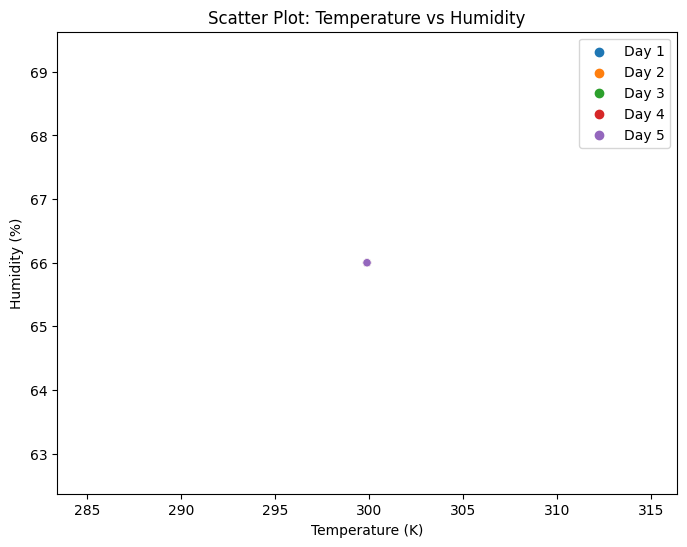

In [16]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def get_weather_data(city):
    BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
    API_KEY = open('api_key', 'r').read()

    url = BASE_URL + "appid=" + API_KEY + "&q=" + city
    response = requests.get(url).json()
    return response

def clean_and_preprocess(data):
    cleaned_data = {}
    
    if data['cod'] == 200:
        # Extract and clean relevant weather attributes
        cleaned_data['temperature'] = data['main'].get('temp', None)
        cleaned_data['humidity'] = data['main'].get('humidity', None)
    else:
        print('Error:', data.get('message', 'Unknown error'))

    return cleaned_data

def main():
    CITY = "Pune"
    NUM_DAYS = 5  # Number of days to analyze

    data_list = []
    for _ in range(NUM_DAYS):
        raw_data = get_weather_data(CITY)
        preprocessed_data = clean_and_preprocess(raw_data)
        if preprocessed_data:
            data_list.append(preprocessed_data)

    if data_list:
        # Prepare data for scatter plot
        temperatures = [data.get('temperature', 0) for data in data_list]
        humidity = [data.get('humidity', 0) for data in data_list]
        
        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=temperatures, y=humidity, hue=[f"Day {i+1}" for i in range(NUM_DAYS)])
        plt.title('Scatter Plot: Temperature vs Humidity')
        plt.xlabel('Temperature (K)')
        plt.ylabel('Humidity (%)')
        plt.legend()
        
        plt.show()

if __name__ == "__main__":
    main()
